# Deep Dive to Deep Learning and Backpropagation with azure.

El objetivo de este notebook es dar una introduccion a algunas utilidades que ofrece Azure machine learning, dar un ejemplo muy simple del uso practico de las redes neuronales y una breve introduccion a keras y tensorflow.

### Cargamos nuestro dataset

Importamos las librerias usuales

In [61]:
import pandas as pd
import numpy as np

In [62]:
from sklearn.datasets import load_wine #Importamos nuestro dataset de jugete de la libreria scikit-learn.

#Descargamos nuestro dataset
wine = load_wine()

df1 = pd.DataFrame(wine.data)
df1.columns = wine.feature_names
df1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


Información sobre el dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

### Procesamiento del dataset.

En esta parte empieza el verdadero procesamiento de los datos antes de crear nuestra red neuronal. 

La libreria que utilizaremos es scikit-learn la cual es la libreria standar para machine learning en python, la cual tambien tien la facilidad de hacer pipelines de preprocesamiento de datos junto con sus respectivas funcionalidades.

<img src="imagenes/Sklearn_logo.png" width="400">


- Documentación: https://scikit-learn.org/stable/

In [63]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA #Importamos el algrotimo PCA(Principal Component Analysis) para reducción de dimensiones

#Separamos nuestro dataset
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,
                                                    test_size=0.20,
                                                    random_state=42)

#Standarizamos nuestro dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)#Normalizamos nuestros datos z=(x-mean)/std, para que todos esten en el mismo rango.
X_test = scaler.fit_transform(X_test)

#Standarizamos y reducimos las dimensiones
#std_pca = make_pipeline(StandardScaler(), PCA(n_components=2))
#X_train = std_pca.fit_transform(X_train)
#X_test = std_pca.fit_transform(X_test)

### Creación de modelo de deep learning

Para creación de nuestro modelo de deep learning utilizaremos las librerias Tensorflow y Keras las cuales trabajan juntas para facilitar la creación de redees neuronales.

<img src="imagenes/keras_tf.jpeg" width="300">

Imagen del libro Hands on Machine Learning with Scikit-Learn, Keras and Tensorflow por Aurélien Géron.

Documentación:
- Keras: https://keras.io/api/
- Tensorflow: https://www.tensorflow.org/api_docs

In [64]:
#No aseguramos que tengamos tensorflow y keras en su ultima version
#! pip install --upgrade tensorflow

In [65]:
import tensorflow #importamos tensorflow
from tensorflow import keras #importamos keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential #Sequential es el modelo mas simple de redes neuronales (Feedforward NNs)
from tensorflow.keras.layers import Dense #Capa normal de deep learning totalmente conectada 
from tensorflow.keras import utils
from tensorflow.keras import optimizers

# Declaramos una semilla para que siempre nos den los mismos resultados
tensorflow.random.set_seed(0)

#Checamos las versiones de keras y tensorflow
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

Keras version: 2.4.0
TensorFlow version: 2.4.1


In [66]:
# Nos aseguramos que nuestro tipo de datos sea float32 o float64
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')

# Le decimos a tensorflow que nuestras variables objetivo son categoricas
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [67]:
# Definimos nuestros parametros
nodes = 10 # Número de nodos en nuestras capas ocultas o hidden layers
features = len(wine.feature_names) #Número de atributos
wine_classes = wine.target_names #Número de clases a clasificar

#Creamos nuestra red neuronal
model = Sequential()
#Keras agrega automaticamente la capa de inputs
model.add(Dense(nodes, input_dim=features, activation='relu')) #Hidden Layer 1
model.add(Dense(nodes, input_dim=nodes, activation='relu')) #Hidden Layer 2
model.add(Dense(len(wine_classes), input_dim=nodes, activation='sigmoid')) #Output layer

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_29 (Dense)             (None, 3)                 33        
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________
None


### Entrenamos nuestro modelo

In [77]:
#Derclaramos hyper-parametros del modelo
learning_rate = 0.001 #Conviene tener un paso chico porque si no el gradiente puede brincar.
opt = optimizers.SGD(lr=learning_rate) #Declaramos nuestro algoritmo con el cual actualizaremos los pesos. 
#opt = optimizers.Adam(lr=learning_rate) 

#Compilamos el modelo
model.compile(loss='categorical_crossentropy',#Declaramos nuestra función de costo
              optimizer=opt,
              metrics=['accuracy'])

# Entrenamos nuestro modelo con 50 epocas y un "batch" de 10 ejemplos.
num_epochs = 50
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/50
15/15 [==============================] - 0s 12ms/step - loss: 0.7202 - accuracy: 0.7829 - val_loss: 0.7041 - val_accuracy: 0.8333
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.7721 - val_loss: 0.6974 - val_accuracy: 0.8611
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.7952 - val_loss: 0.6906 - val_accuracy: 0.8611
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.7878 - val_loss: 0.6835 - val_accuracy: 0.8611
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6776 - accuracy: 0.7825 - val_loss: 0.6767 - val_accuracy: 0.8611
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6478 - accuracy: 0.7970 - val_loss: 0.6703 - val_accuracy: 0.8611
Epoch 7/50
15/15 [==============================] - 0s 14ms/step - loss: 0.6460 - accuracy: 0.7943 - val_loss: 0.6639 - val_accuracy: 0.8611
Epoch 8/50
15/15 [

In [78]:
type(history.history)

dict

Algunos recursos que pueden ayudar a entender mejor los conceptos:
- Gradient Descent: https://www.youtube.com/watch?v=IHZwWFHWa-w
- Cross entropy loss function: https://www.youtube.com/watch?v=6ArSys5qHAU
- Performance metrics: https://www.youtube.com/watch?v=2osIZ-dSPGE

### Evaluación del modelo

Graficamos las curvas de aprendizaje del set de entrenamiento y el test set.

Lo que se espera es que las dos bajen juntas, en el caso contrario podría indicar overfitting o underfitting.

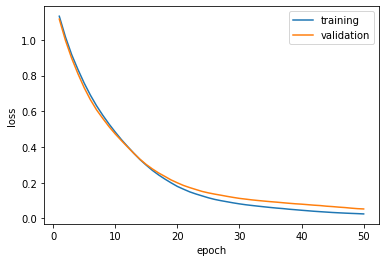

In [87]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
fig = plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [88]:
type(fig)

list

Matriz de confusion.

Un buen modelo tendra una diagonal bien definida.

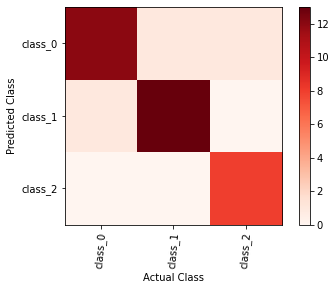

In [80]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Reds)
plt.colorbar()
tick_marks = np.arange(len(wine_classes))
plt.xticks(tick_marks, wine_classes, rotation=85)
plt.yticks(tick_marks, wine_classes)
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

### Pesos Aprendidos

In [81]:
 for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print('------------\nWeights:\n',weights,'\nBiases:\n', biases)

------------
Weights:
 [[-0.19427498 -0.34086928  0.03731931  0.21464008 -0.06556716  0.27108136
  -0.10377592  0.48931652  0.18152598 -0.39315462]
 [ 0.21372367  0.16797972  0.08512294 -0.1620195  -0.10042514  0.18845835
   0.4439417   0.20865342  0.3322421  -0.42917514]
 [-0.20706645 -0.4854431   0.23847175  0.33410197  0.17825048  0.04022984
   0.24706069 -0.433691   -0.47586763  0.23471214]
 [-0.3203244  -0.14348628 -0.20179558 -0.49982193 -0.4017728   0.3231263
   0.18313038  0.5139824   0.41889963 -0.31696343]
 [-0.40104827  0.05145485 -0.33418703  0.03841482  0.5046187  -0.3257045
  -0.50649387  0.11480745  0.09343772  0.29097855]
 [ 0.0729349  -0.38453066  0.43354473 -0.10808805  0.11380529 -0.30213922
  -0.51959616 -0.17633678 -0.46544486 -0.47119406]
 [ 0.4268563   0.41080526 -0.08279347  0.09897359  0.20294936  0.12840977
   0.33925405 -0.22943793 -0.34090707  0.0943486 ]
 [-0.08149108  0.11508285  0.42680946  0.22459619 -0.5512137  -0.19240819
  -0.23145874 -0.43023887  0.4

En total se aprendieron 283 parametros.

### Guardamos el Modelo.

In [82]:
# Save the trained model
modelFileName = 'models/wine-classifier.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as models/wine-classifier.h5


In [83]:
# Cargamos el modelo
model = models.load_model(modelFileName)

# Tomamos un ejemplo del test set
x_new = [X_test[10]]
x_new = np.array(x_new)
print ('New sample:'+str(format(x_new)))

# Predecimos la nueva clase
class_probabilities = model.predict(x_new)
predictions = np.argmax(class_probabilities, axis=1)

print(wine_classes[predictions[0]])

New sample:[[ 0.53637204 -0.38282884  0.87353409  0.14758633 -0.07869263  0.36624231
   0.48805986 -0.5490214   0.26266406 -0.67897214  0.77072924  1.73119782
   0.14260936]]
class_0


## Experimentos en Azure Machine Learning Studio

Una de las funciones principales funciones de Azure ML studio es la capacidad de realizar experimentos, los cuales son muy utiles para los cientificos de datos porque nos dejan registrar diferentes parametros y guardar los resultados de los diferentes experimentos.

### Conectamos con nuestro workspace

In [84]:
import azureml.core
from azureml.core import Workspace

# Load the workspace from the saved config file
ws = Workspace.from_config()
print('Ready to use Azure ML {} to work with {}'.format(azureml.core.VERSION, ws.name))


Ready to use Azure ML 1.22.0 to work with prueba1


Lo mejor es tener el experimento como un script en casop que quieras probar con varios parametros pero en este caso no consideraremos eso.

Nota: debe de haver una carpeta models en el directorio.

In [91]:
from azureml.core import Run
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import tensorflow 
from tensorflow import keras 
from tensorflow.keras import models
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from azureml.core import Experiment
import joblib
import os

# Create an Azure ML experiment in your workspace
experiment = Experiment(workspace=ws, name="deeplearning-experiment")

# Start logging data from the experiment, obtaining a reference to the experiment run
run = experiment.start_logging()
print("Starting experiment:", experiment.name)

#Descargamos nuestro dataset
wine = load_wine()

df1 = pd.DataFrame(wine.data)
df1.columns = wine.feature_names

#Separamos nuestro dataset
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,
                                                    test_size=0.20,
                                                    random_state=42)

#Standarizamos nuestro dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)#Normalizamos nuestros datos z=(x-mean)/std, para que todos esten en el mismo rango.
X_test = scaler.fit_transform(X_test)

# Declaramos una semilla para que siempre nos den los mismos resultados
tensorflow.random.set_seed(0)


# Nos aseguramos que nuestro tipo de datos sea float32 o float64
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')

# Le decimos a tensorflow que nuestras variables objetivo son categoricas
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

# Definimos nuestros parametros
nodes = 10 # Número de nodos en nuestras capas ocultas o hidden layers
features = len(wine.feature_names) #Número de atributos
wine_classes = wine.target_names #Número de clases a clasificar

#Guardamos el numero de nodos
run.log('Número de Nodos',nodes)


#Creamos nuestra red neuronal
model = Sequential()
#Keras agrega automaticamente la capa de inputs
model.add(Dense(nodes, input_dim=features, activation='relu')) #Hidden Layer 1
model.add(Dense(nodes, input_dim=nodes, activation='relu')) #Hidden Layer 2
model.add(Dense(len(wine_classes), input_dim=nodes, activation='sigmoid')) #Output layer

#Derclaramos hyper-parametros del modelo
learning_rate = 0.001 #Conviene tener un paso chico porque si no el gradiente puede brincar.
#opt = optimizers.SGD(lr=learning_rate) #Declaramos nuestro algoritmo con el cual actualizaremos los pesos. 
opt = optimizers.Adam(lr=learning_rate) 
optimizador = "Adam"

#Guardamos el learning rate y el nombre del optimizador
run.log('Learning Rate',learning_rate)
run.log('Optimizador',optimizador)

#Compilamos el modelo
model.compile(loss='categorical_crossentropy',#Declaramos nuestra función de costo
              optimizer=opt,
              metrics=['accuracy'])

# Entrenamos nuestro modelo con 50 epocas y un "batch" de 10 ejemplos.
num_epochs = 50
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=10, validation_data=(x_test, y_test))

#Creamos un diccionario con información del entrenamiento y lo guardamos
historia = {
    "training_loss": history.history["loss"],
    "training_accuracy": history.history["accuracy"],
    "val_loss": history.history["val_loss"],
    "val_accuracy": history.history["val_accuracy"]
}
run.log_table("training_info_by_epochs", historia)

# Guardamos el modelo
modelFileName = 'models/wine-classifier.h5'
model.save(modelFileName)
del model  # elimina el anterior
print('model saved as', modelFileName)


# Terminamos el experimento
run.complete()

Starting experiment: deeplearning-experiment
Epoch 1/50
15/15 [==============================] - 0s 13ms/step - loss: 1.1793 - accuracy: 0.3889 - val_loss: 1.1169 - val_accuracy: 0.4444
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 1.0534 - accuracy: 0.4344 - val_loss: 0.9967 - val_accuracy: 0.5000
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 0.9618 - accuracy: 0.4699 - val_loss: 0.8967 - val_accuracy: 0.5556
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 0.8705 - accuracy: 0.5277 - val_loss: 0.8109 - val_accuracy: 0.6111
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 0.7734 - accuracy: 0.6394 - val_loss: 0.7329 - val_accuracy: 0.6667
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6780 - accuracy: 0.7643 - val_loss: 0.6657 - val_accuracy: 0.7500
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: 0.6185 - accuracy: 0.7850 - val_loss: 0.60